# Topicos Avanzados de Inteligencia Artificial
### Instructor: Dr. Luis Felipe Marín Urías
### Facultad de ingeniería Eléctrica y Electrónica
### Universidad Veracruzana


# OpenCV Histograma, Umbrales y Binarización


Vamos a aplicar un caso de estudio real, se tienen una serie de imágenes de suelos tomadas con microscopio electrónico. Se requiere medir el nivel de porosidad de una muestra de suelo por medio de una herramienta automática.

El nivel de porosidad está determinado por los espacios (poros) que hay entre los granulos del suelo, es necesario entonces discriminar los espacios de los granulos. 

## Desplegando una imagen 

Para poder trabajar con una imagen es necesario leerla desde un archivo o un dispositivo, en este caso podremos leer una serie de archivos de suelos y empezaremos con uno en particular.

In [1]:
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt


Leemos el archivo de la imagen

original:
![title](./files/suelo1.png)

In [2]:
img = cv2.imread("./files/suelo1.png", cv2.IMREAD_GRAYSCALE)

cv2.IMREAD_GRAYSCALE está indicando que vamos a leer en escala de grises el archivo.

Desplegamos la imagen usando un plot.

Nota: no es la única forma de hacerlo, para aplicaciones tal vez usemos las funciones de desplegado de openCV python.


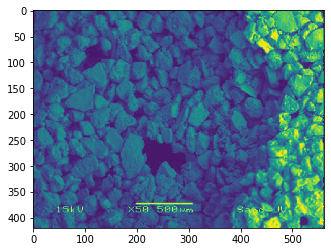

In [3]:
plt.imshow(img)

Los colores salen un poco extraños porque estan interpretados como RGB y son es una imagen en escala de grises (GRAY), así que usamos la funcion:

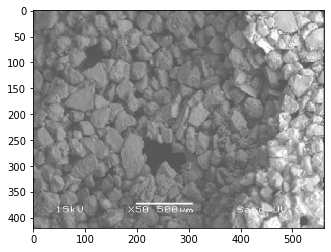

In [18]:
img2 = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
plt.imshow(img2)

Con esto convertimos de GRAY -> RGB que es la manera como matplotlib maneja las imágenes.

## Umbrales y binarización

Un umbral es un valor límite a partir del cual se toman en cuenta, o no, determinados valores ya sea superiores o inferiores.
Normalmente los umbrales los usamos con valores de intensidad para discriminar las intensidades que no se desean tomar en cuenta de la imagen.


La Binarización por otro lado es dividir las intensidades de la imagen en 2, las que estén arriba del umbral se les asigna valor máximo (255) por lo que se pueden apreciar en blanco y las que están abajo del umbral se les asigna el valor mínimo de intensidad (0) por lo que se ven negras en la imagen.

Los umbrales  es una de las formas mas simples de trabajar con la separación de características que necesitamos de las imágenes. Se basa simplemente en establecer el conjunto de valores que necesitamos para discriminar. Los umbrales en OpenCV pueden generarse de manera manual y adaptativo, este último toma autmáticamente los valores dependiendo de la vecindad del pixel definida por un kernel o ventana, es una binarización local y es lo que le da el la característica de adaptativo.

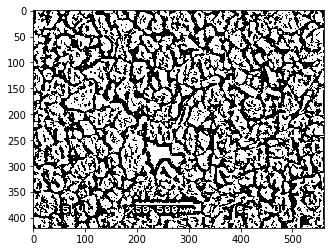

In [5]:
#cv2.equalizeHist(img,img2)
#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
#cl1 = clahe.apply(img2)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,15,2)
th2 = cv2.cvtColor(th2, cv2.COLOR_GRAY2RGB)
plt.imshow(th2)


LA función adaptiveThreshold usa los siguientes parámetros:
img - que es la imagen en escala de grises.
255 - que representa el color que va a poner como máximo dentro de la binarización, en este caso es blanco (255)
cv2.ADAPTIVE_THRESH_MEAN_C - que es el método de binarización el cual puede ser basado en la media de la vencindad del pixel, como en este caso.
15 - el tamaño del kernel de 15 x 15.
2 - un factor de constante que se le quita a la media.

el método de binarización también puede basarse en una distribución gaussiana de la vecindad, como el siguiente caso.

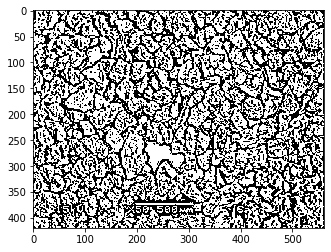

In [6]:
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,15,2)
th2 = cv2.cvtColor(th2, cv2.COLOR_GRAY2RGB)
plt.imshow(th2)

en ambos métodos adaptativos nos podemos percatar que el poro más grande de la imagen original se pierde, esto se debe a que el método adaptativo trabaja basado en la vecindad de cada pixel.

## Histograma

Los histogramas nos dan mucha información de una imagen por ejemplo, la distribución del color o de las intensidades.

Text(0.5, 1.0, 'Histograma')

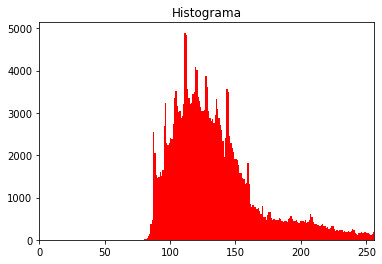

In [7]:
img3 = img.flatten() #fusionamos todas las sublistas(RGB, GRAY, BGR) a un vector unidimensional

plt.hist(img3,256,[0,256], color = 'r')#(solo funciona con escala de grises para ver la intensidad)
plt.xlim([0,256])
plt.title('Histograma')

Viendo el histograma que nos representa la distribución de las intensidades de la imagen, nos damos cuenta con esto de dos cosas:

1.- Todas las intensidades están mas allá del valor 80 aproximadamente.

2.- Que la mayor parte de las intensidades se encuentra en la sección entre las intensidades de 80 a 165

Por lo que podríamos eliminar un sector de iluminaciones no deseadas por medio de un umbral.

Se puede también hacer una ecualización del histograma, con eso se hace una distribución homogenea de las intensidades en la imagen y logramos poder resaltar algunas características oscuras o muy claras.

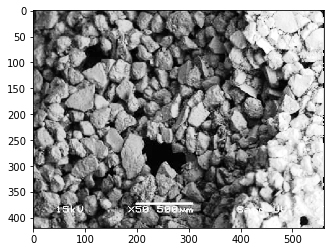

In [8]:
res = cv2.equalizeHist(img,img2)
res2 = cv2.cvtColor(res, cv2.COLOR_GRAY2RGB)
plt.imshow(res2)

el histograma de ésta imagen nos queda como sigue:

Text(0.5, 1.0, 'Histograma Equalizado')

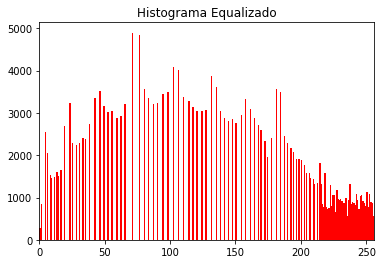

In [9]:
plt.hist(res.flatten(),256,[0,256], color = 'r')#(solo funciona con escala de grises para ver la intensidad)
plt.xlim([0,256])
plt.title('Histograma Equalizado')

Haremos una binarización basado en un umbral en intensidad 200 en el histograma para la imagen original y la equalizada.

In [10]:
th, dst = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)
th2, dst2 = cv2.threshold(res, 200, 255, cv2.THRESH_BINARY)

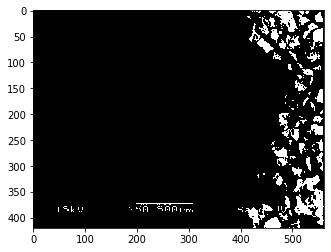

In [11]:
dst = cv2.cvtColor(dst, cv2.COLOR_GRAY2RGB)
plt.imshow(dst)

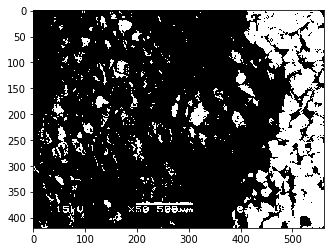

In [12]:
dst2 = cv2.cvtColor(dst2, cv2.COLOR_GRAY2RGB)
plt.imshow(dst2)

El umbral está muy alto por lo que en ninguna imagen podemos observar bien los poros, sin embargo en la imagen equalizada podemos observar muchos mas detalles.

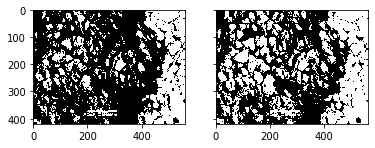

In [13]:
th, dst = cv2.threshold(img, 140, 255, cv2.THRESH_BINARY)
th2, dst2 = cv2.threshold(res, 140, 255, cv2.THRESH_BINARY)
dst = cv2.cvtColor(dst, cv2.COLOR_GRAY2RGB)
dst2 = cv2.cvtColor(dst2, cv2.COLOR_GRAY2RGB)

fig,ax = plt.subplots(1,2,sharey=True)

ax[0].imshow(dst)
ax[1].imshow(dst2)


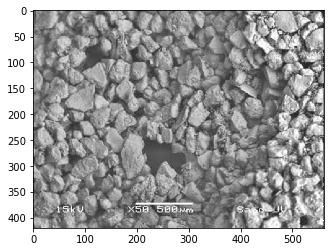

In [14]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(20,20))
cl1 = clahe.apply(img)
imgeq = cv2.cvtColor(cl1, cv2.COLOR_GRAY2RGB)
plt.imshow(imgeq)

Text(0.5, 1.0, 'Histograma')

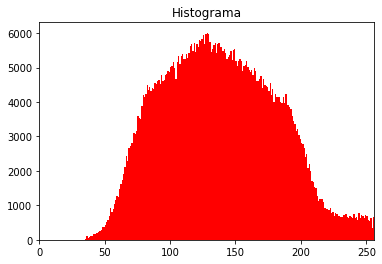

In [15]:
img4 = imgeq.flatten() #fusionamos todas las sublistas(RGB, GRAY, BGR) a un vector unidimensional

plt.hist(img4,256,[0,256], color = 'r')#(solo funciona con escala de grises para ver la intensidad)
plt.xlim([0,256])
plt.title('Histograma')

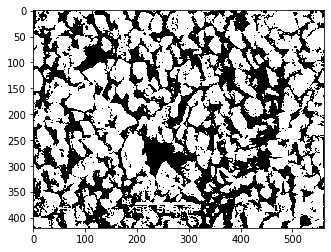

In [16]:
th3, dst3 = cv2.threshold(imgeq, 123, 255, cv2.THRESH_BINARY)
#dst3 = cv2.cvtColor(dst3, cv2.COLOR_GRAY2RGB)
plt.imshow(dst3)